# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

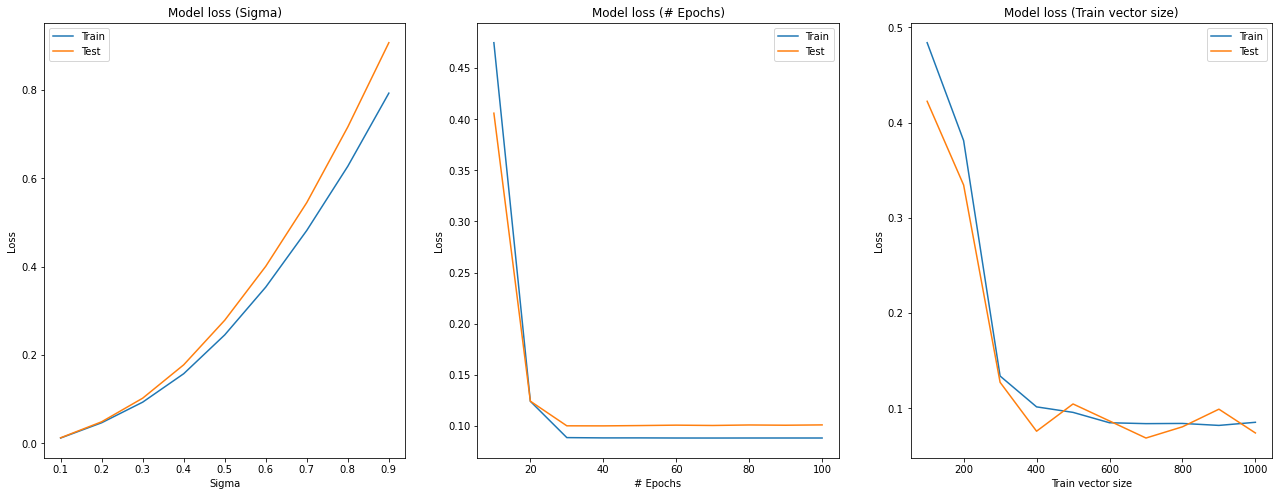

In [32]:
import matplotlib.pyplot as plt
import numpy as np

y1, y2 = np.loadtxt("ex11.1/NN_Nepochs.out", usecols=(0,1), unpack="true")
x1, x2 = np.loadtxt("ex11.1/NN_sigma.out", usecols=(0,1), unpack="true")
z1, z2 = np.loadtxt("ex11.1/NN_Ntrain.out", usecols=(0,1), unpack="true")

x = np.arange(9)/10 + 0.1
y = np.arange(10)*10 + 10
z = np.arange(10)*100 + 100


fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(22,8))

ax1.plot(x, x1)
ax1.plot(x, x2)
ax1.set_title('Model loss (Sigma)')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Sigma')
ax1.legend(['Train', 'Test'], loc='best')
ax2.plot(y, y1)
ax2.plot(y, y2)
ax2.set_title('Model loss (# Epochs)')
ax2.set_ylabel('Loss')
ax2.set_xlabel('# Epochs')
ax2.legend(['Train', 'Test'], loc='best')
ax3.plot(z, z1)
ax3.plot(z, z2)
ax3.set_title('Model loss (Train vector size)')
ax3.set_ylabel('Loss')
ax3.set_xlabel('Train vector size')
ax3.legend(['Train', 'Test'], loc='best')


### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

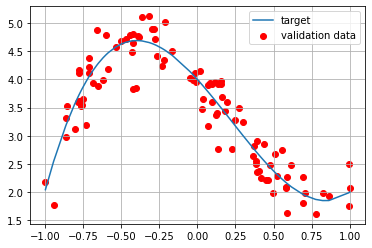

In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


def f( x ):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f( x_valid )  # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal( f( x_train ) , sigma ) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal( f( x_valid ), sigma )

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()




In [58]:
Model1 = tf.keras.Sequential()
Model1.add(Dense( 100 , input_shape=(1,) , activation= "relu" ))
Model1.add(Dense( 70, activation= "relu" ))
Model1.add(Dense( 40 , activation= "relu" ))
Model1.add(Dense( 1 ))

# compile the model choosing optimizer, loss and metrics objects
Model1.compile(optimizer="sgd", loss='mse', metrics=['mse'])

Model2 = tf.keras.Sequential()
Model2.add(Dense( 200 , input_shape=(1,) , activation= "selu" ))
Model2.add(Dense( 45  , activation= "selu" ))
Model2.add(Dense( 1  , activation= "selu" ))

# compile the model choosing optimizer, loss and metrics objects
Model2.compile(optimizer=tf.keras.optimizers.Adam(), loss="mse", metrics=['mse'])

history1 = Model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



Epoch 1/30
157/157 [==============================] - 1s 5ms/step - loss: 1.1189 - mse: 1.1189 - val_loss: 0.2680 - val_mse: 0.2680
Epoch 2/30
157/157 [==============================] - 1s 4ms/step - loss: 0.2165 - mse: 0.2165 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 3/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1358 - mse: 0.1358 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 4/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1123 - mse: 0.1123 - val_loss: 0.1221 - val_mse: 0.1221
Epoch 5/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1029 - mse: 0.1029 - val_loss: 0.1221 - val_mse: 0.1221
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.0980 - mse: 0.0980 - val_loss: 0.1149 - val_mse: 0.1149
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.0956 - mse: 0.0956 - val_loss: 0.1136 - val_mse: 0.1136
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 0.

In [59]:


history2 = Model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



Epoch 1/30
157/157 [==============================] - 1s 4ms/step - loss: 1.5603 - mse: 1.5603 - val_loss: 0.2748 - val_mse: 0.2748
Epoch 2/30
157/157 [==============================] - 1s 3ms/step - loss: 0.2004 - mse: 0.2004 - val_loss: 0.1633 - val_mse: 0.1633
Epoch 3/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1324 - mse: 0.1324 - val_loss: 0.1397 - val_mse: 0.1397
Epoch 4/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1173 - mse: 0.1173 - val_loss: 0.1369 - val_mse: 0.1369
Epoch 5/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1147 - mse: 0.1147 - val_loss: 0.1600 - val_mse: 0.1600
Epoch 6/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1088 - mse: 0.1088 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 7/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 8/30
157/157 [==============================] - 1s 4ms/step - loss: 0.

In [60]:
# evaluate model
score_1 = Model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_2 = Model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)


# print performance
print("Model 1: ")
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

print("Model 2: ")
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])



4/4 [==============================] - 0s 3ms/step - loss: 0.1169 - mse: 0.1169
Model 1: 
Test loss: 12.833978652954102
Test accuracy: 12.833978652954102
Model 2: 
Test loss: 0.11694850772619247
Test accuracy: 0.11694850772619247


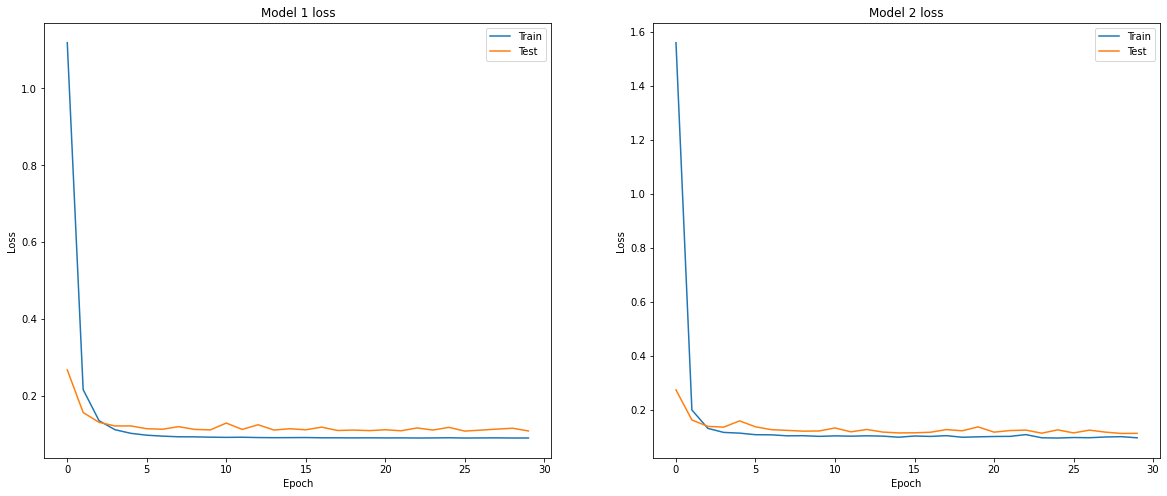

In [61]:
fig , ax = plt.subplots( 1 , 2 , figsize=(20 , 8))

# look into training history
# Plot training & validation loss values
ax[0].plot(history1.history['loss'])
ax[0].plot(history1.history['val_loss'])
ax[0].set_title('Model 1 loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Model 2 loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')



29/29 [==============================] - 0s 2ms/step


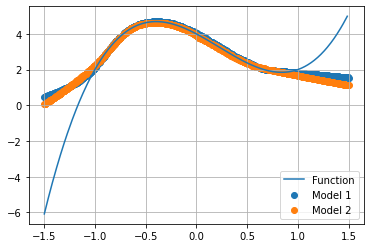

In [63]:


x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = f( x_valid )  # ideal (target) linear function
plt.plot(x_valid, y_target , label = "Function")

x_predicted = np.random.uniform(-1.5, 1.5, 900)
y_predicted_1 = Model1.predict(x_predicted)
y_predicted_2 = Model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_1 , label = "Model 1 ")
plt.scatter(x_predicted, y_predicted_2 , label = "Model 2 ")

plt.legend()
plt.grid(True)
plt.show()



### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Text(0.5, 0.92, 'Training data')

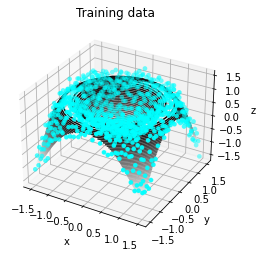

In [93]:
def F(x , y):
    return np.sin(x**2 + y**2) 

# generate training inputs
np.random.seed(0)
data_train = np.random.uniform( low = -1.5 , high= 1.5 , size=(1500 , 2) )
data_valid = np.random.uniform( low = -1.5 , high= 1.5 , size=(170 , 2) )


data_valid.sort()

y_target = F( data_valid[:,0] , data_valid[:,1] ) 

sigma = 0.2
y_train = np.random.normal( F( data_train[:,0] , data_train[:,1] ) , sigma )
y_valid = np.random.normal( F( data_valid[:,0] , data_valid[:,1] ) , sigma )


#Plotting the target function and the training data
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')

X, Y, np.meshgrid(x, y)
Z = np.random.normal(F(X, Y), sigma)
ax.scatter(X, Y, Z, color='cyan', linewidth=0.1);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Training data')



In [91]:


Net = tf.keras.Sequential()
Net.add( Dense( 200, input_shape=(2,), activation="relu") )
Net.add( Dense( 130 , activation="relu" ) )
Net.add( Dense( 50, activation="relu") )
Net.add( Dense( 1, activation="relu") )
    
opt = tf.keras.optimizers.Adam()

Net.compile( loss='mean_squared_error', optimizer=opt , metrics=['mse'] )

history = Net.fit(x=data_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, y_valid))



Epoch 1/30
47/47 [==============================] - 1s 9ms/step - loss: 0.2502 - mse: 0.2502 - val_loss: 0.2212 - val_mse: 0.2212
Epoch 2/30
47/47 [==============================] - 0s 6ms/step - loss: 0.1862 - mse: 0.1862 - val_loss: 0.1988 - val_mse: 0.1988
Epoch 3/30
47/47 [==============================] - 0s 6ms/step - loss: 0.1688 - mse: 0.1688 - val_loss: 0.1825 - val_mse: 0.1825
Epoch 4/30
47/47 [==============================] - 0s 6ms/step - loss: 0.1547 - mse: 0.1547 - val_loss: 0.1808 - val_mse: 0.1808
Epoch 5/30
47/47 [==============================] - 0s 5ms/step - loss: 0.1327 - mse: 0.1327 - val_loss: 0.1367 - val_mse: 0.1367
Epoch 6/30
47/47 [==============================] - 0s 5ms/step - loss: 0.1159 - mse: 0.1159 - val_loss: 0.1145 - val_mse: 0.1145
Epoch 7/30
47/47 [==============================] - 0s 5ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 8/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0753 - mse: 0.07

In [95]:
# evaluate model
score = Net.evaluate(data_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


6/6 [==============================] - 0s 3ms/step - loss: 0.0683 - mse: 0.0683

Test loss: 0.06827462464570999
Test accuracy: 0.06827462464570999


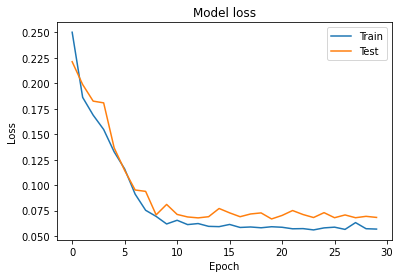

In [96]:


# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



16/16 [==============================] - 0s 2ms/step


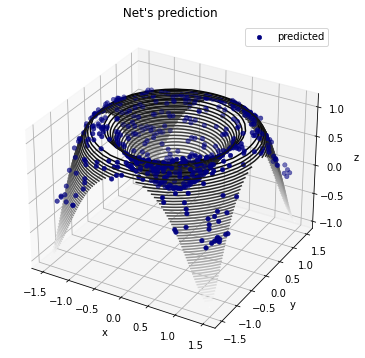

In [97]:
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='binary')

x_predicted = np.random.uniform(-1.5, 1.5, size=(500,2))
y_predicted = Net.predict(x_predicted)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='navy', linewidth=0.5, label='predicted')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title( " Net's prediction " )
ax.legend()
